# Цель лабораторной работы

Изучение ансамблей моделей машинного обучения

# Задание

1. Выберите набор данных (датасет) для решения задачи классификации или регресии.
2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
4. Обучите две ансамблевые модели. Оцените качество моделей с помощью одной из подходящих для задачи метрик. Сравните качество полученных моделей.

# Ход выполнения лабораторной работы

In [40]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

%matplotlib inline

# Устанавливаем тип графиков
sns.set(style="ticks")

# Для лучшего качествоа графиков
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

# Устанавливаем ширину экрана для отчета
pd.set_option("display.width", 70)


# Загружаем данные
data = pd.read_csv('../data/hotel_bookings.csv')
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [41]:
data = data.dropna()
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [42]:
data.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [43]:
data.shape

(217, 32)

In [44]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'agent', 'company', 'days_in_waiting_list', 'customer_type',
       'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

In [45]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

Но сначала сделаем, кодирование категориальных признаков.

In [46]:
le1 = LabelEncoder()
data['hotel'] = le1.fit_transform(data['hotel']);

In [47]:
le2 = LabelEncoder()
data['arrival_date_month'] = le2.fit_transform(data['arrival_date_month']);

In [48]:
le3 = LabelEncoder()
data['meal'] = le3.fit_transform(data['meal']);

In [49]:
le4 = LabelEncoder()
data['country'] = le4.fit_transform(data['country']);

In [50]:
le5 = LabelEncoder()
data['market_segment'] = le5.fit_transform(data['market_segment']);

In [51]:
le6 = LabelEncoder()
data['distribution_channel'] = le6.fit_transform(data['distribution_channel']);

In [52]:
le7 = LabelEncoder()
data['reserved_room_type'] = le7.fit_transform(data['reserved_room_type']);

In [53]:
le8 = LabelEncoder()
data['deposit_type'] = le8.fit_transform(data['deposit_type']);

In [54]:
le9 = LabelEncoder()
data['customer_type'] = le9.fit_transform(data['customer_type']);

In [55]:
le9 = LabelEncoder()
data['reservation_status'] = le9.fit_transform(data['reservation_status']);

In [56]:
le10 = LabelEncoder()
data['reservation_status_date'] = le10.fit_transform(data['reservation_status_date']);

Набор данных не содержит пропусков

In [58]:
# Убедимся, что целевой признак
# для задачи бинарной классификации содержит только 0 и 1
data['is_canceled'].unique()

array([0, 1])

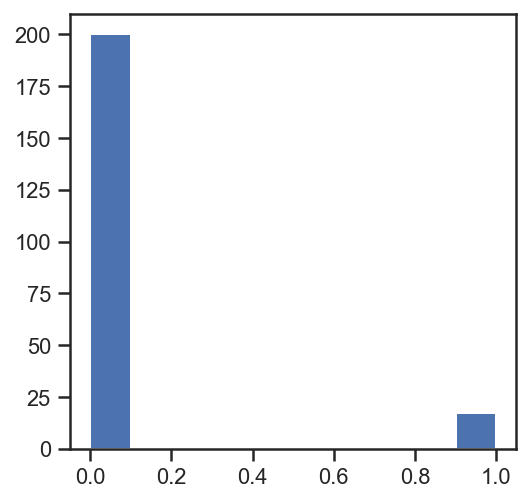

In [59]:
# Оценим дисбаланс классов для Occupancy
fig, ax = plt.subplots(figsize=(4,4)) 
plt.hist(data['is_canceled'])
plt.show()

In [60]:
data['is_canceled'].value_counts()

0    200
1     17
Name: is_canceled, dtype: int64

In [61]:
# посчитаем дисбаланс классов
total = data.shape[0]
class_1, class_0 = data['is_canceled'].value_counts()
print('Класс 0 составляет {}%, а класс 1 составляет {}%.'
      .format(round(class_0 / total, 2)*100, round(class_1 / total, 2)*100))

Класс 0 составляет 8.0%, а класс 1 составляет 92.0%.


Дисбаланса классов практически нет

#### Проведем масштабирование данных 

In [85]:
# Числовые колонки для масштабирования
scale_cols = ['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'required_car_parking_spaces', 'country', 'meal', 'market_segment', 'reservation_status', 'hotel']


In [86]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[scale_cols])

In [87]:
# Добавим масштабированные данные в набор данных
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    data[new_col_name] = sc1_data[:,i]

In [88]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,babies_scaled,is_repeated_guest_scaled,previous_cancellations_scaled,previous_bookings_not_canceled_scaled,required_car_parking_spaces_scaled,country_scaled,meal_scaled,market_segment_scaled,reservation_status_scaled,hotel_scaled
2392,1,0,6,2015,10,42,11,2,0,2,...,0.0,0.0,0.0,0.0,1.0,0.882353,0.0,1.0,0.5,1.0
2697,1,0,24,2015,10,44,26,7,15,1,...,0.0,0.0,0.0,0.0,0.0,0.058824,0.0,0.2,0.5,1.0
2867,1,0,24,2015,9,45,3,0,3,2,...,0.0,0.0,0.0,0.0,0.0,0.470588,0.0,0.2,0.5,1.0
2877,1,0,24,2015,9,45,3,2,10,1,...,0.0,0.0,0.0,0.0,0.0,0.882353,0.0,0.2,0.5,1.0
2878,1,0,24,2015,9,45,3,3,10,2,...,0.0,0.0,0.0,0.0,0.0,0.705882,0.0,0.2,0.5,1.0


In [89]:
corr_cols_1 = scale_cols + ['is_canceled']
corr_cols_1

['lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'required_car_parking_spaces',
 'country',
 'meal',
 'market_segment',
 'reservation_status',
 'hotel',
 'is_canceled']

In [90]:
scale_cols_postfix = [x+'_scaled' for x in scale_cols]
corr_cols_2 = scale_cols_postfix + ['is_canceled']
corr_cols_2

['lead_time_scaled',
 'arrival_date_year_scaled',
 'arrival_date_week_number_scaled',
 'arrival_date_day_of_month_scaled',
 'stays_in_weekend_nights_scaled',
 'stays_in_week_nights_scaled',
 'adults_scaled',
 'children_scaled',
 'babies_scaled',
 'is_repeated_guest_scaled',
 'previous_cancellations_scaled',
 'previous_bookings_not_canceled_scaled',
 'required_car_parking_spaces_scaled',
 'country_scaled',
 'meal_scaled',
 'market_segment_scaled',
 'reservation_status_scaled',
 'hotel_scaled',
 'is_canceled']

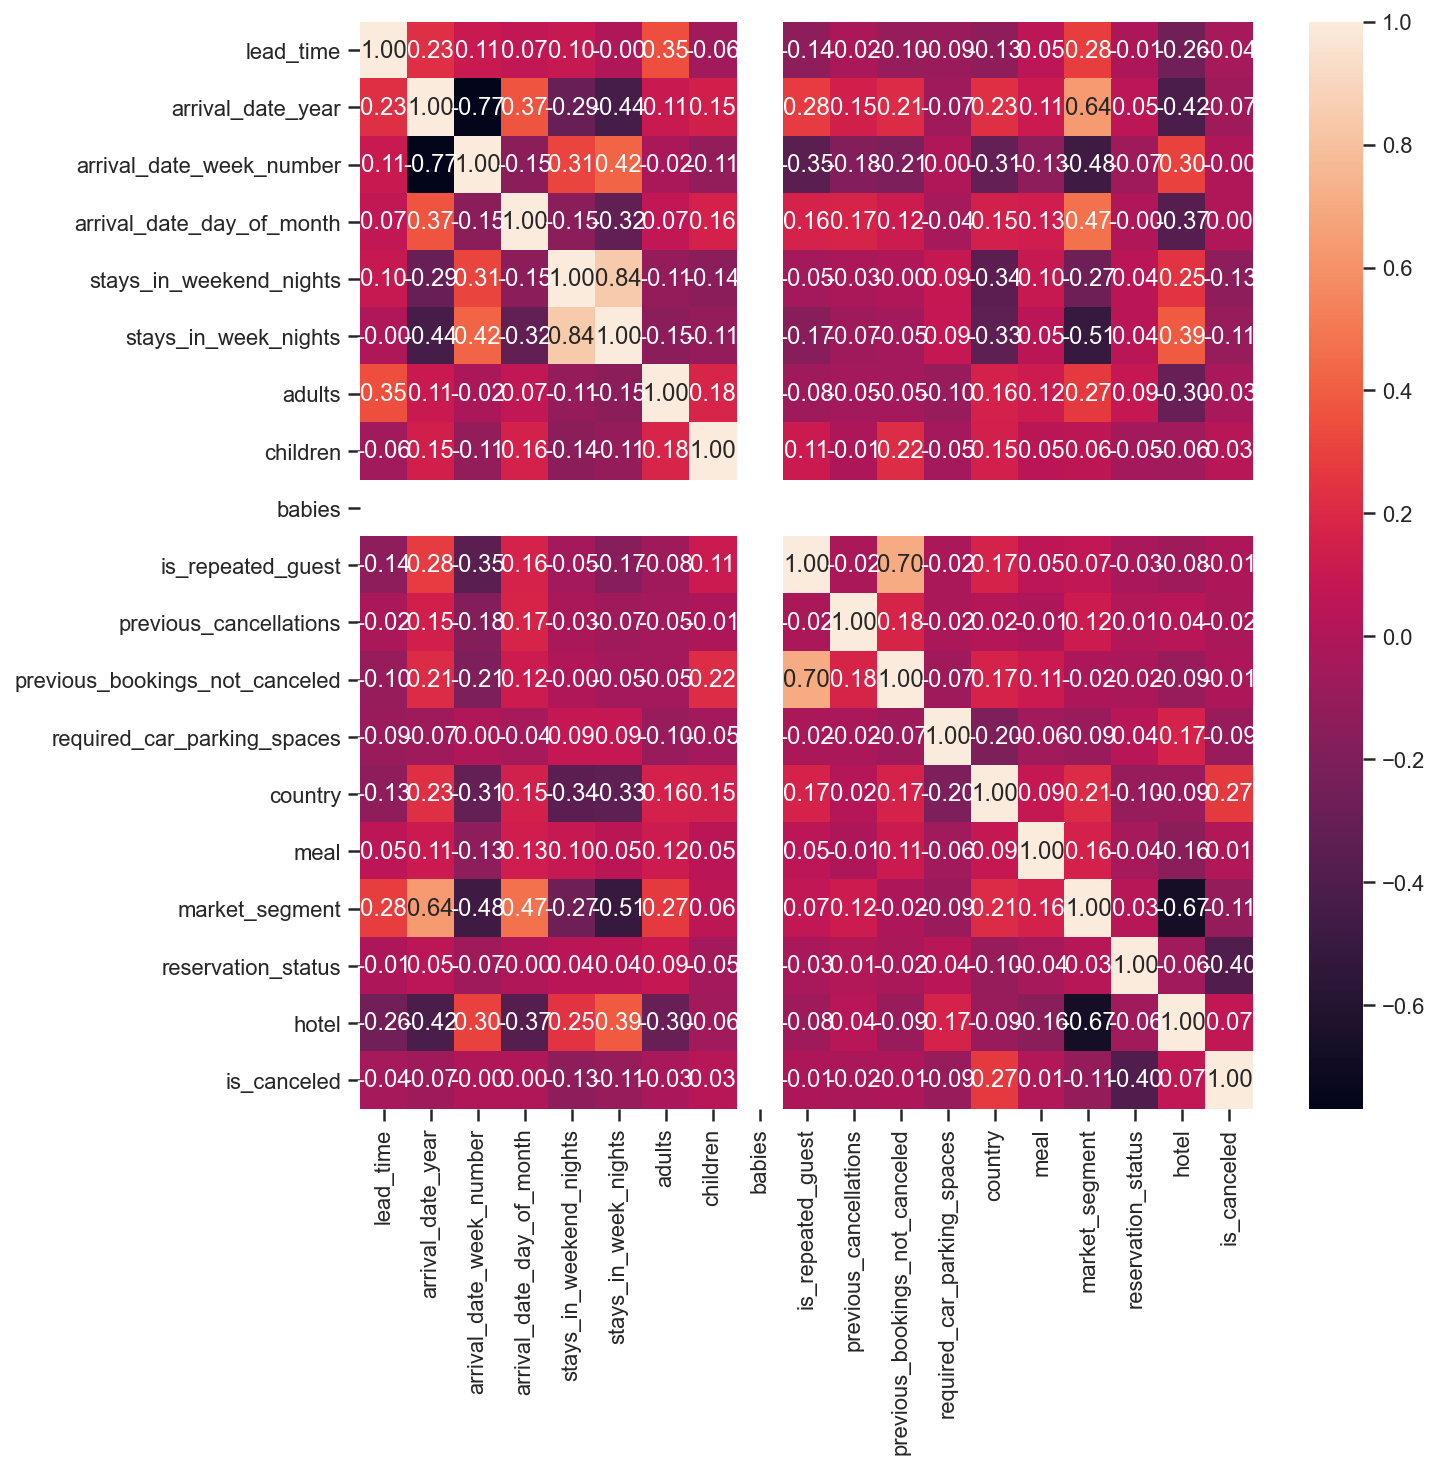

In [91]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data[corr_cols_1].corr(), annot=True, fmt='.2f')

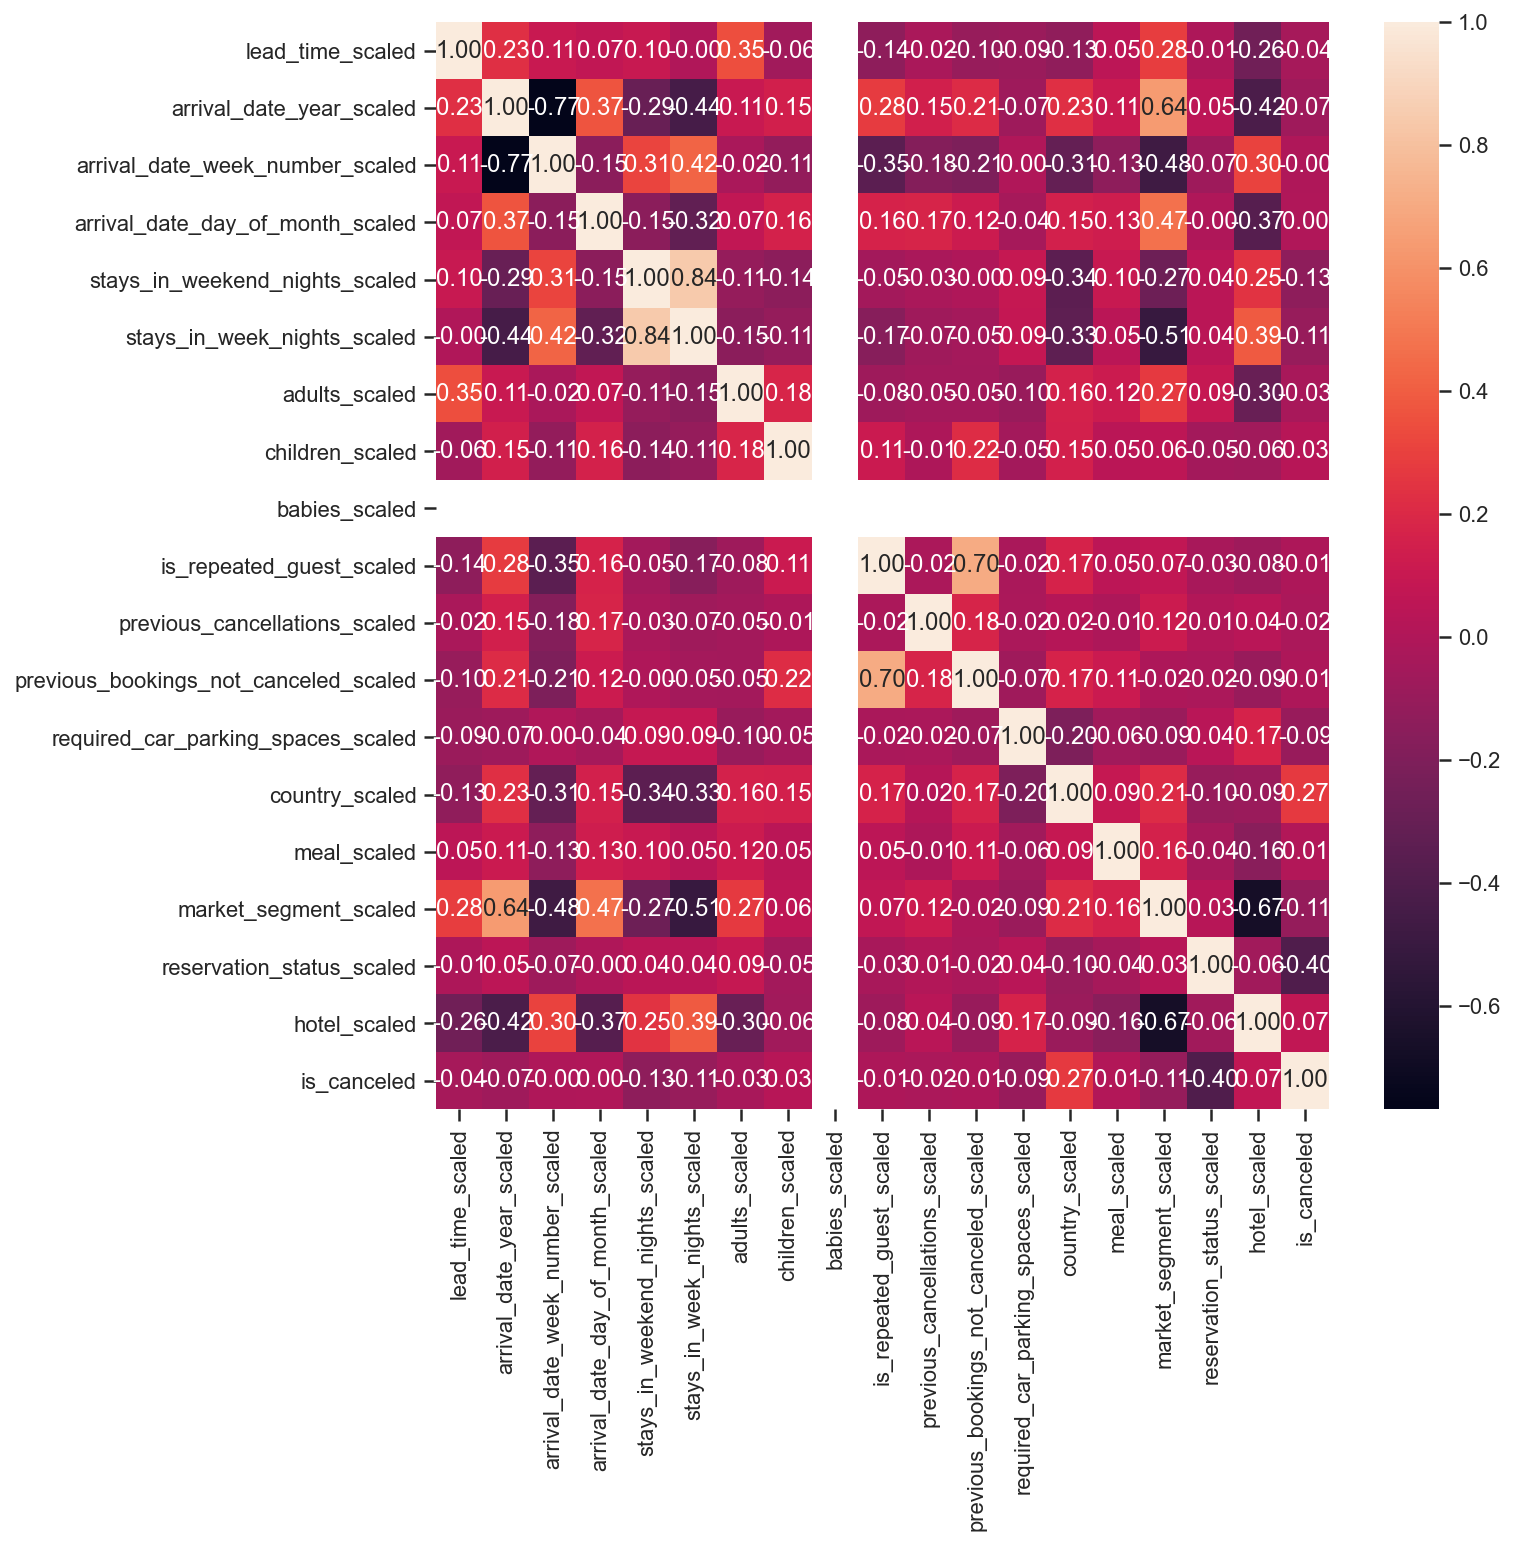

In [92]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data[corr_cols_2].corr(), annot=True, fmt='.2f')

На основе корреляционной матрицы можно сделать следующие выводы:

* Корреляционные матрицы для исходных и масштабированных данных совпадают;
* Оставим только 'country', 'meal', 'reservation_status', 'hotel', так как они имеют корреляцию с целевым признаком.

In [93]:
# Числовые колонки для масштабирования
class_cols = ['country', 'meal', 'reservation_status', 'hotel']


In [94]:
X = data[class_cols]
y = data['is_canceled']
print(X, "\n")
print(y)

        country  meal  reservation_status  hotel
2392         15     0                   1      1
2697          1     0                   1      1
2867          8     0                   1      1
2877         15     0                   1      1
2878         12     0                   1      1
...         ...   ...                 ...    ...
112499        5     0                   1      0
113046       12     0                   1      0
113082       12     0                   1      0
113627       10     0                   1      0
116451       15     0                   1      0

[217 rows x 4 columns] 

2392      0
2697      0
2867      0
2877      0
2878      0
         ..
112499    0
113046    0
113082    0
113627    0
116451    0
Name: is_canceled, Length: 217, dtype: int64


#### Разделим выборку на обучающую и тестовую

In [95]:
# С использованием метода train_test_split разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (162, 4)
X_test: (55, 4)
y_train: (162,)
y_test: (55,)


In [96]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()

In [97]:
# Сохранение метрик
metricLogger = MetricLogger()

In [98]:
def test_model(model_name, model, metricLogger):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    metricLogger.add('precision', model_name, precision)
    metricLogger.add('recall', model_name, recall)
    metricLogger.add('f1', model_name, f1)
    metricLogger.add('accuracy', model_name, accuracy)
    
    print('*****************************************************')
    print(model)
    print(model_name)
    print("accuracy:", accuracy)
    print("f1_score:", f1)
    print("precision_score:", precision)
    print("recall:", recall)
    print('*****************************************************')

#### Обучим модели

Будем использовать модели: случайный лес, градиентный бустинг

In [99]:
test_model('Random forest', RandomForestClassifier(), metricLogger)
test_model('GB', GradientBoostingClassifier(), metricLogger)

*****************************************************
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Random forest
accuracy: 1.0
f1_score: 1.0
precision_score: 1.0
recall: 1.0
*****************************************************
*****************************************************
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=

In [100]:
# Метрики качества модели
metrics = metricLogger.df['metric'].unique()
metrics

array(['precision', 'recall', 'f1', 'accuracy'], dtype=object)

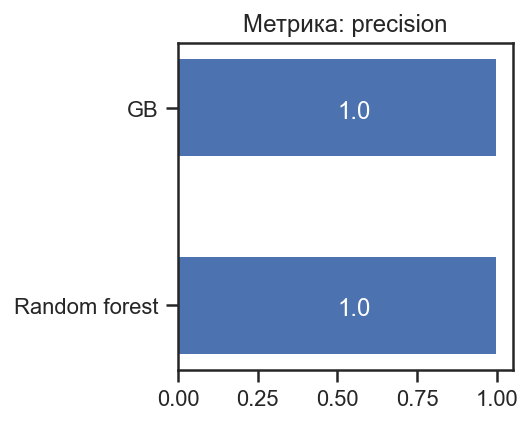

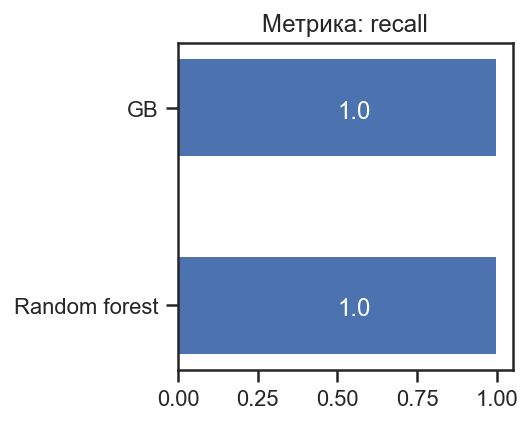

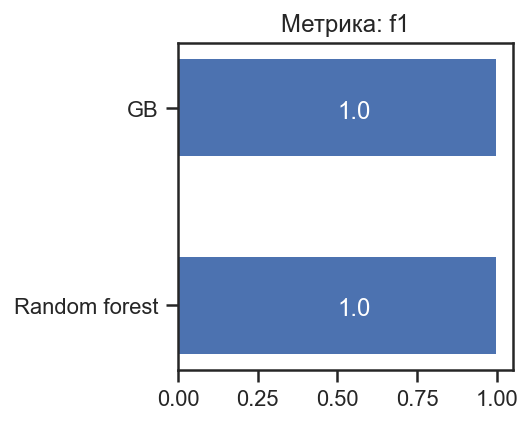

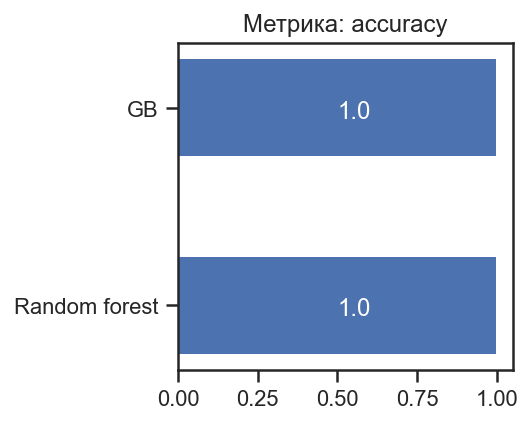

In [101]:
# Построим графики метрик качества модели
for metric in metrics:
    metricLogger.plot('Метрика: ' + metric, metric, figsize=(3, 3))

#### Вывод: на основании четырех метрик из четырех используемых, модели оказались одинаково эффективно.